In [1]:
import pandas as pd
import numpy as np
path="C:/Users/HUGO/Desktop/Maestria en CIENCIA DE DATOS UANL/Aprendizaje automatico/"
pd.set_option("display.max_columns",None)
#! pip install -U celer
from celer import GroupLasso

Este archivo contiene datos de 2001-2006 para evitar tener datos de las crisis económicas, para aislar el estudio suponiendo un crecimiento económico constante, y otras modificaciones como categorizacion de columnas, de strings, etc.

In [33]:
loans=pd.read_csv(path+"loansmodified1.csv")
loans

,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,paid,ChgOffPrinGr,GrAppv,SBA_Appv,business,ID,same_state,APPROVALtimestamp,DISBURSEMENTtimestamp,timediff,Terms_comp,NAICStwo_digits,NAICS_cat
0,2000-01-04,47,20,1.0,0,0,2.0,1.0,0,2004-10-31,35000.0,0.0,0.0,13722.0,35000.0,17500.0,1,507,0.0,9.469440e+08,1.099181e+09,152236800.0,1.0,23,Construction
1,2000-01-31,60,2,2.0,0,0,1.0,0.0,0,2000-05-31,120000.0,0.0,1.0,0.0,120000.0,60000.0,2,509,0.0,9.492768e+08,9.597312e+08,10454400.0,1.0,0,NaN
2,2000-02-01,84,7,2.0,0,0,1.0,0.0,0,2000-03-31,20000.0,0.0,1.0,0.0,20000.0,10000.0,3,512,0.0,9.493632e+08,9.544608e+08,5097600.0,1.0,0,NaN
3,2000-02-04,48,1,2.0,0,0,1.0,0.0,0,2000-02-29,15000.0,0.0,1.0,0.0,15000.0,7500.0,4,514,0.0,9.496224e+08,9.517824e+08,2160000.0,1.0,0,NaN
4,2000-02-16,84,55,2.0,0,0,1.0,0.0,0,2000-03-31,102000.0,0.0,1.0,0.0,102000.0,51000.0,5,516,0.0,9.506592e+08,9.544608e+08,3801600.0,1.0,72,Accommodation and food services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313700,2005-12-30,14,25,1.0,1,25,1.0,0.0,0,2005-12-31,15000.0,0.0,0.0,7327.0,15000.0,12750.0,276108,879716,0.0,1.135901e+09,1.135987e+09,86400.0,1.0,62,Health care and social assistance
313701,2005-12-30,252,5,2.0,0,5,2.0,0.0,0,2005-12-31,852100.0,0.0,1.0,0.0,852100.0,639075.0,276109,879727,0.0,1.135901e+09,1.135987e+09,86400.0,NaN,48,Transportation and warehousing
313702,2005-12-30,84,1,1.0,0,1,1.0,0.0,0,2005-12-31,15000.0,0.0,1.0,0.0,15000.0,12750.0,276110,879807,0.0,1.135901e+09,1.135987e+09,86400.0,1.0,51,Information
313703,2005-12-30,84,5,1.0,2,5,1.0,0.0,0,2005-12-31,5000.0,0.0,1.0,0.0,5000.0,4250.0,276111,879868,0.0,1.135901e+09,1.135987e+09,86400.0,1.0,42,Wholesale trade


Modificaciones adicionales para NAICS

In [10]:
loans["NAICS"].nunique()
loans['NAICStwo_digits'] = loans['NAICS'].astype(str).str[:2]
loans["NAICStwo_digits"].value_counts()

44    39592
72    36521
81    31357
54    27947
23    24815
62    21614
42    19724
45    17331
56    16106
33    15722
0     12977
48     8302
32     7879
71     6116
53     5389
51     5234
31     4959
52     4634
61     3125
11     2342
49     1119
21      530
22      251
55       89
92       30
Name: NAICStwo_digits, dtype: int64

In [11]:
loans["NAICS_cat"]=loans["NAICStwo_digits"].map({"11":"Agriculture, forestry, fishing and hunting",
    "21" :"Mining, quarrying, and oil and gas extraction",
    "22" :"Utilities",
    "23" :"Construction",
    "31": "Manufacturing","32": "Manufacturing","33": "Manufacturing",
    "42" :"Wholesale trade",
    "44" :"Retail trade","45" :"Retail trade",
    "48" :"Transportation and warehousing","49" :"Transportation and warehousing",
    "51" :"Information",
    "52" :"Finance and insurance",
    "53" :"Real estate and rental and leasing",
    "54" :"Professional, scientific, and technical services",
    "55" :"Management of companies and enterprises",
    "56" :"Administrative and support and waste management and remediation services",
    "61" :"Educational services",
    "62" :"Health care and social assistance",
    "71" :"Arts, entertainment, and recreation",
    "72" :"Accommodation and food services",
    "81" :"Other services (except public administration)",
    "92" :"Public administration" 
}
)

In [12]:
loans.loc[loans["NAICS"]==0,["NAICS","SCIAN category","NAICS_cat"]]=np.nan
loans["NAICS_cat"].value_counts()

Retail trade                                                                56923
Accommodation and food services                                             36521
Other services (except public administration)                               31357
Manufacturing                                                               28560
Professional, scientific, and technical services                            27947
Construction                                                                24815
Health care and social assistance                                           21614
Wholesale trade                                                             19724
Administrative and support and waste management and remediation services    16106
Transportation and warehousing                                               9421
Arts, entertainment, and recreation                                          6116
Real estate and rental and leasing                                           5389
Information     

In [39]:
#loans.to_csv(path+"loansmodified2.csv",index=False)

In [23]:
#loans.drop(["NAICS","FranchiseCode","SCIAN category"],axis=1,inplace=True)
loans.to_csv(path+"loansmodified3.csv",index=False) #dropeando algunas del scian

**Leer a partir de aqui:**

In [23]:
loans=pd.read_csv(path+"loansmodified3.csv")
#loans

In [24]:
loans.loc[loans.CreateJob>0,"CreateJob"]=1
loans.loc[loans.CreateJob==0,"CreateJob"]=0
loans["CreateJob"].value_counts()


0    199463
1    114242
Name: CreateJob, dtype: int64

In [25]:
loans.loc[loans.RetainedJob>0,"RetainedJob"]=1
loans.loc[loans.RetainedJob==0,"RetainedJob"]=0
loans["RetainedJob"].value_counts()


1    209433
0    104272
Name: RetainedJob, dtype: int64

In [26]:
loans=loans[~loans["paid"].isna()]
#loans.isna().sum()

In [58]:
loans["NAICS_cat"].value_counts()

Retail trade                                                                56822
Accommodation and food services                                             36487
Other services (except public administration)                               31270
Manufacturing                                                               28511
Professional, scientific, and technical services                            27858
Construction                                                                24765
Health care and social assistance                                           21582
Wholesale trade                                                             19696
Administrative and support and waste management and remediation services    16050
Transportation and warehousing                                               9398
Arts, entertainment, and recreation                                          6110
Real estate and rental and leasing                                           5374
Information     

In [11]:
to_scale=["Term","NoEmp","DisbursementGross","BalanceGross","GrAppv","SBA_Appv","timediff","ChgOffPrinGr"]

In [12]:
#escalarlo y volver a intentarlo
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(loans[to_scale])

In [13]:
loans[to_scale]=scaled

In [27]:
#obtenemos variables categóricas
categorical=["NewExist","UrbanRural","RevLineCr","NAICS_cat","same_state","LowDoc","CreateJob","RetainedJob"]#seleccionar categoricas
loans_dummies = pd.get_dummies(loans, columns = categorical,drop_first=True) #to get k-1 variables
y=loans_dummies["paid"]
loans_dummies=loans_dummies.drop(["ApprovalDate","DisbursementDate","business","ID","NAICStwo_digits","Terms_comp","paid","DISBURSEMENTtimestamp","APPROVALtimestamp"],axis=1)
naics=[e for e in loans_dummies.columns if "NAICS" in e]
loans_dummies2=loans_dummies.drop([e for e in naics if loans_dummies[e].sum()<27000],axis=1) #drop naics cat with few vals
loans_dummies2

,Term,NoEmp,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,timediff,NewExist_2.0,UrbanRural_2.0,RevLineCr_1.0,NAICS_cat_Manufacturing,NAICS_cat_Other services (except public administration),"NAICS_cat_Professional, scientific, and technical services",NAICS_cat_Retail trade,same_state_1.0,LowDoc_1,CreateJob_1,RetainedJob_1
0,47,20,35000.0,0.0,13722.0,35000.0,17500.0,152236800.0,0,1,1,0,0,0,0,0,0,0,0
1,60,2,120000.0,0.0,0.0,120000.0,60000.0,10454400.0,1,0,0,0,0,0,0,0,0,0,0
2,84,7,20000.0,0.0,0.0,20000.0,10000.0,5097600.0,1,0,0,0,0,0,0,0,0,0,0
3,48,1,15000.0,0.0,0.0,15000.0,7500.0,2160000.0,1,0,0,0,0,0,0,0,0,0,0
4,84,55,102000.0,0.0,0.0,102000.0,51000.0,3801600.0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313700,14,25,15000.0,0.0,7327.0,15000.0,12750.0,86400.0,0,0,0,0,0,0,0,0,0,1,1
313701,252,5,852100.0,0.0,0.0,852100.0,639075.0,86400.0,1,1,0,0,0,0,0,0,0,0,1
313702,84,1,15000.0,0.0,0.0,15000.0,12750.0,86400.0,0,0,0,0,0,0,0,0,0,0,1
313703,84,5,5000.0,0.0,0.0,5000.0,4250.0,86400.0,0,0,0,0,0,0,0,0,0,1,1


In [15]:
len(y)

313094

**Lasso regression to filter features**

Referencia:
https://github.com/Badr-MOUFAD/beyond-OLS-med-supp-material

In [16]:
from typing import List, Tuple
import pandas as pd


def adapt_to_group_lasso(X: pd.DataFrame) -> Tuple[pd.DataFrame, List[int]]:
    """Prepare dataframe to be fitted using a GroupLasso.
    Parameters
    ----------
    X : pd.DataFrame
        Dataframe. The columns of ``X`` shouldn't be one hot encoded.
    Returns
    -------
    X_dummies: pd.DataFrame
        X rearranged as continuous features, one-hot encoded
        categorical features.
    groups_size: list of int
        list of group size where continuous
        features are considered as group of size 1.
    Note
    ----
    This function changes the order of columns in dataframe.
    """
    X_rearranged = pd.concat((X.select_dtypes(exclude='object'),
                              X.select_dtypes(include='object')),
                             axis=1)
    groups_size = []
    for col in X_rearranged.columns:
        is_categorical = X[col].dtype == 'object'
        size = len(X[col].value_counts()) if is_categorical else 1
        groups_size.append(size)

    return pd.get_dummies(X_rearranged), groups_size


if __name__ == '__main__':
    pass

In [17]:
from typing import List, Tuple

import pandas as pd
import numpy as np
from celer import celer_path


def score_features(X: pd.DataFrame,
                   y: pd.DataFrame
                   ) -> List[Tuple[str, float]]:
    r"""Score features in dataframe using GroupLasso.
    Score function:
    .. math::
        \max \{ \frac{\lambda}{\lambda_{max}} \ | \ \beta_j \neq 0 \}
    Parameters
    ----------
    X : pd.DataFrame
        Dataframe. Feature with ``object`` type are considered categorical.
    y : pd.DataFrame
        Target feature.
    Returns
    -------
    List of tuples (feature_name, score)
        Return a list of tuples with the name of feature and the corresponding score.
        ``[(feature_name, score), ...]``.
    """
    X_with_dummies, groups = adapt_to_group_lasso(X)

    n_groups = len(groups)
    grp_scores = np.zeros(n_groups)
    grp_indices = np.append([0], np.cumsum(groups))

    n_alphas = 100
    alphas, coefs, _ = celer_path(X_with_dummies.values, y.values.flatten(),
                                  pb='grouplasso', groups=groups,
                                  n_alphas=n_alphas, eps=1e-6, prune=1)

    for i in range(n_alphas):
        for g in range(n_groups):
            # skip groups whose scores are already computed
            if grp_scores[g] != 0:
                continue

            # select group coefs
            grp_g_indices = slice(grp_indices[g], grp_indices[g+1])
            coefs_g = coefs[:, i][grp_g_indices]

            if np.linalg.norm(coefs_g, ord=np.inf) > 0:
                grp_scores[g] = alphas[i] / alphas[0]  # alpha / alpha_max

    return list(zip(X.columns, grp_scores))


if __name__ == '__main__':
    pass


In [28]:
# fit group lasso

# pre processing
X=loans_dummies2
X_dummies, groups_sizes = adapt_to_group_lasso(X)

# init and fit
grp_lasso = GroupLasso(
    groups=groups_sizes,
    alpha=1.
)

grp_lasso.fit(X_dummies.values, y.values)

GroupLasso(groups=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
# inspect solution
list(zip(X_dummies.columns, grp_lasso.coef_)) #increiblemente, escalandolas salen resultados peores (todos 0)

[('Term', 0.0012735816323693248),
 ('NoEmp', 0.0),
 ('DisbursementGross', 1.322141398708561e-07),
 ('BalanceGross', -0.0),
 ('ChgOffPrinGr', -2.7522296072876003e-06),
 ('GrAppv', 2.020166917027226e-07),
 ('SBA_Appv', -3.4727122433093763e-07),
 ('timediff', 2.1019339379344198e-09),
 ('NewExist_2.0', 0.0),
 ('UrbanRural_2.0', 0.0),
 ('RevLineCr_1.0', 0.0),
 ('NAICS_cat_Manufacturing', 0.0),
 ('NAICS_cat_Other services (except public administration)', 0.0),
 ('NAICS_cat_Professional, scientific, and technical services', 0.0),
 ('NAICS_cat_Retail trade', 0.0),
 ('same_state_1.0', 0.0),
 ('LowDoc_1', 0.0),
 ('CreateJob_1', -0.0),
 ('RetainedJob_1', -0.0)]

In [30]:
# score variables and sort
scores = score_features(X, y)

sorted_scores = sorted(scores, 
                       key=lambda item: item[1], 
                       reverse=True)

In [31]:
# bar plot of scores
import plotly.graph_objects as go
from operator import itemgetter

fig = go.Figure(data=[
    go.Bar(
        x=[s[0] for s in sorted_scores],
        y=[s[1] for s in sorted_scores]
    )
])

fig.update_layout(
    title="Scores of variables",
    yaxis={
        'type': 'log',
        'title': 'score'
    }
)

fig.show()

In [32]:
# select top K features
K = 7

print(sorted_scores[:K])

[('timediff', 0.8697490026177833), ('DisbursementGross', 0.01519911082952933), ('ChgOffPrinGr', 0.0012328467394420659), ('GrAppv', 0.00026560877829466864), ('SBA_Appv', 0.00026560877829466864), ('Term', 5.336699231206313e-06), ('NoEmp', 0.0)]


No me gustaron los resultados (debido a que considero que mas variables deberian de cobrar mas importancia), así que hare el clustering jerarquico metiendo todas las variables.

Con los anteriores métodos de filtrado (tion_Tarea3), coinciden en que las variables más importantes serían (no necesariamente en ese orden):
* ChgOffPrinGr
* Term
* timediff
* SBA_Appv

Variables que estan presentes en esta iteración de filtrado pero no en la anterior como las mas importantes:
* DisbursementGross
* GrAppv 

Variables que estan presentes en la iteración anterior de filtrado pero no en esta como las mas importantes:
* RevLineCr
* SCIAN category (sin ser dummy)
* NoEmp

Trabajaré con la SCIAN category como tal, no como dummy:

# Clustering - No Supervisado

In [37]:
#disponemos de las dates format porque el algoritmo no podra con ese formato, y de la scian category la convertimos a factor
loansC=loans.drop(["ApprovalDate","DisbursementDate","business","ID","APPROVALtimestamp","DISBURSEMENTtimestamp","Terms_comp",
                  "NAICStwo_digits"],axis=1)
#loansC["NAICS_cat2"] = pd.factorize(loans.NAICS_cat)[0] + 1
loansC

,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,paid,ChgOffPrinGr,GrAppv,SBA_Appv,same_state,timediff,NAICS_cat
0,0.082601,0.002500,1.0,0,0,2.0,1.0,0,0.002963,0.0,0.0,0.006996,0.010003,0.005912,0.0,0.910632,Construction
1,0.105448,0.000250,2.0,0,0,1.0,0.0,0,0.011089,0.0,1.0,0.000000,0.035010,0.020692,0.0,0.278505,NaN
2,0.147627,0.000875,2.0,0,0,1.0,0.0,0,0.001529,0.0,1.0,0.000000,0.005590,0.003304,0.0,0.254622,NaN
3,0.084359,0.000125,2.0,0,0,1.0,0.0,0,0.001052,0.0,1.0,0.000000,0.004119,0.002434,0.0,0.241525,NaN
4,0.147627,0.006876,2.0,0,0,1.0,0.0,0,0.009368,0.0,1.0,0.000000,0.029715,0.017562,0.0,0.248844,Accommodation and food services
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313700,0.024605,0.003125,1.0,1,1,1.0,0.0,0,0.001052,0.0,0.0,0.003736,0.004119,0.004260,0.0,0.232280,Health care and social assistance
313701,0.442882,0.000625,2.0,0,1,2.0,0.0,0,0.081073,0.0,1.0,0.000000,0.250397,0.222074,0.0,0.232280,Transportation and warehousing
313702,0.147627,0.000125,1.0,0,1,1.0,0.0,0,0.001052,0.0,1.0,0.000000,0.004119,0.004260,0.0,0.232280,Information
313703,0.147627,0.000625,1.0,1,1,1.0,0.0,0,0.000096,0.0,1.0,0.000000,0.001177,0.001304,0.0,0.232280,Wholesale trade


In [38]:
loans["NAICS_cat"].value_counts()

Retail trade                                                                56822
Accommodation and food services                                             36487
Other services (except public administration)                               31270
Manufacturing                                                               28511
Professional, scientific, and technical services                            27858
Construction                                                                24765
Health care and social assistance                                           21582
Wholesale trade                                                             19696
Administrative and support and waste management and remediation services    16050
Transportation and warehousing                                               9398
Arts, entertainment, and recreation                                          6110
Real estate and rental and leasing                                           5374
Information     

In [39]:
loans["NAICS_cat2"]=np.nan
loans.loc[loans["NAICS_cat"]=="Retail trade","NAICS_cat2"]="Retail"
loans.loc[loans["NAICS_cat"]=="Accommodation and food services","NAICS_cat2"]="Accommodation and food services"
loans.loc[loans["NAICS_cat"]=="Other services (except public administration)","NAICS_cat2"]="Other"
loans.loc[loans["NAICS_cat"]=="Manufacturing","NAICS_cat2"]="Manufacturing"
loans.loc[loans["NAICS_cat"]=="Professional, scientific, and technical services","NAICS_cat2"]="Professional, scientific, and technical services"
loans.loc[loans["NAICS_cat"]=="Construction","NAICS_cat2"]="Construction"
loans.loc[loans["NAICS_cat"]=="Health care and social assistance","NAICS_cat2"]="Health care and social assistance"
loans.loc[loans["NAICS_cat2"].isna(),"NAICS_cat2"]="Other"
loans.drop("NAICS_cat",axis=1,inplace=True)

In [42]:
#obtenemos variables categóricas
categorical=["NewExist","UrbanRural","RevLineCr","same_state","LowDoc","CreateJob","RetainedJob","NAICS_cat2"]#seleccionar categoricas
loans_dummies = pd.get_dummies(loans, columns = categorical,drop_first=True) #to get k-1 variables
y=loans_dummies["paid"]
loans_dummies=loans_dummies.drop(["ApprovalDate","DisbursementDate","business","ID","NAICStwo_digits","Terms_comp","paid","DISBURSEMENTtimestamp","APPROVALtimestamp"],axis=1)
loans_dummies

,Term,NoEmp,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,timediff,NewExist_2.0,UrbanRural_2.0,RevLineCr_1.0,same_state_1.0,LowDoc_1,CreateJob_1,RetainedJob_1,NAICS_cat2_Construction,NAICS_cat2_Health care and social assistance,NAICS_cat2_Manufacturing,NAICS_cat2_Other,"NAICS_cat2_Professional, scientific, and technical services",NAICS_cat2_Retail
0,47,20,35000.0,0.0,13722.0,35000.0,17500.0,152236800.0,0,1,1,0,0,0,0,1,0,0,0,0,0
1,60,2,120000.0,0.0,0.0,120000.0,60000.0,10454400.0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,84,7,20000.0,0.0,0.0,20000.0,10000.0,5097600.0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,48,1,15000.0,0.0,0.0,15000.0,7500.0,2160000.0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,84,55,102000.0,0.0,0.0,102000.0,51000.0,3801600.0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313700,14,25,15000.0,0.0,7327.0,15000.0,12750.0,86400.0,0,0,0,0,0,1,1,0,1,0,0,0,0
313701,252,5,852100.0,0.0,0.0,852100.0,639075.0,86400.0,1,1,0,0,0,0,1,0,0,0,1,0,0
313702,84,1,15000.0,0.0,0.0,15000.0,12750.0,86400.0,0,0,0,0,0,0,1,0,0,0,1,0,0
313703,84,5,5000.0,0.0,0.0,5000.0,4250.0,86400.0,0,0,0,0,0,1,1,0,0,0,1,0,0


In [43]:
scaled = scaler.fit_transform(loans_dummies[to_scale])
loans_dummies[to_scale]=scaled
loans_dummies

,Term,NoEmp,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,timediff,NewExist_2.0,UrbanRural_2.0,RevLineCr_1.0,same_state_1.0,LowDoc_1,CreateJob_1,RetainedJob_1,NAICS_cat2_Construction,NAICS_cat2_Health care and social assistance,NAICS_cat2_Manufacturing,NAICS_cat2_Other,"NAICS_cat2_Professional, scientific, and technical services",NAICS_cat2_Retail
0,0.082601,0.002500,0.002963,0.0,0.006996,0.010003,0.005912,0.910632,0,1,1,0,0,0,0,1,0,0,0,0,0
1,0.105448,0.000250,0.011089,0.0,0.000000,0.035010,0.020692,0.278505,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.147627,0.000875,0.001529,0.0,0.000000,0.005590,0.003304,0.254622,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0.084359,0.000125,0.001052,0.0,0.000000,0.004119,0.002434,0.241525,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.147627,0.006876,0.009368,0.0,0.000000,0.029715,0.017562,0.248844,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313700,0.024605,0.003125,0.001052,0.0,0.003736,0.004119,0.004260,0.232280,0,0,0,0,0,1,1,0,1,0,0,0,0
313701,0.442882,0.000625,0.081073,0.0,0.000000,0.250397,0.222074,0.232280,1,1,0,0,0,0,1,0,0,0,1,0,0
313702,0.147627,0.000125,0.001052,0.0,0.000000,0.004119,0.004260,0.232280,0,0,0,0,0,0,1,0,0,0,1,0,0
313703,0.147627,0.000625,0.000096,0.0,0.000000,0.001177,0.001304,0.232280,0,0,0,0,0,1,1,0,0,0,1,0,0


In [49]:
#usaremos davies_bouldin_score
#https://pyshark.com/davies-bouldin-index-for-k-means-clustering-evaluation-in-python/
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as  plt

In [53]:
comparisondb=[]
models=[]
for e in range(2,10):
    kmeans = KMeans(e,random_state=12)
    clusters = kmeans.fit_predict(loans_dummies)
    db_index = davies_bouldin_score(loans_dummies, clusters)
    comparisondb.append(db_index)
    models.append(clusters)
    print(f"El index Davies-Bouldin en la iteración de {e} grupos es de: ",db_index)

bestmodel=models[comparisondb.index(min(comparisondb))]

El index Davies-Bouldin en la iteración de 2 grupos es de:  2.1061374714697174
El index Davies-Bouldin en la iteración de 3 grupos es de:  2.069744405811292
El index Davies-Bouldin en la iteración de 4 grupos es de:  2.059598843071428
El index Davies-Bouldin en la iteración de 5 grupos es de:  2.1669955823459452
El index Davies-Bouldin en la iteración de 6 grupos es de:  2.0531456348996997
El index Davies-Bouldin en la iteración de 7 grupos es de:  1.8767897017088884
El index Davies-Bouldin en la iteración de 8 grupos es de:  1.8821845035888636
El index Davies-Bouldin en la iteración de 9 grupos es de:  1.9668664356732017


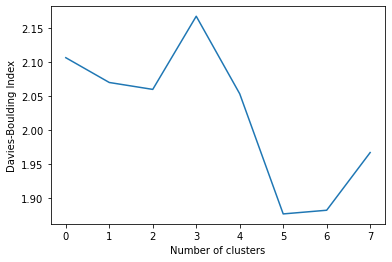

In [70]:
plt.plot(comparisondb)
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

In [65]:
list(bestmodel)

313094

In [68]:
groups = loans_dummies.copy()
groups["cluster"]=list(bestmodel)
groups

,Term,NoEmp,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,timediff,NewExist_2.0,UrbanRural_2.0,RevLineCr_1.0,same_state_1.0,LowDoc_1,CreateJob_1,RetainedJob_1,NAICS_cat2_Construction,NAICS_cat2_Health care and social assistance,NAICS_cat2_Manufacturing,NAICS_cat2_Other,"NAICS_cat2_Professional, scientific, and technical services",NAICS_cat2_Retail,cluster
0,0.082601,0.002500,0.002963,0.0,0.006996,0.010003,0.005912,0.910632,0,1,1,0,0,0,0,1,0,0,0,0,0,0
1,0.105448,0.000250,0.011089,0.0,0.000000,0.035010,0.020692,0.278505,1,0,0,0,0,0,0,0,0,0,1,0,0,6
2,0.147627,0.000875,0.001529,0.0,0.000000,0.005590,0.003304,0.254622,1,0,0,0,0,0,0,0,0,0,1,0,0,6
3,0.084359,0.000125,0.001052,0.0,0.000000,0.004119,0.002434,0.241525,1,0,0,0,0,0,0,0,0,0,1,0,0,6
4,0.147627,0.006876,0.009368,0.0,0.000000,0.029715,0.017562,0.248844,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313700,0.024605,0.003125,0.001052,0.0,0.003736,0.004119,0.004260,0.232280,0,0,0,0,0,1,1,0,1,0,0,0,0,5
313701,0.442882,0.000625,0.081073,0.0,0.000000,0.250397,0.222074,0.232280,1,1,0,0,0,0,1,0,0,0,1,0,0,0
313702,0.147627,0.000125,0.001052,0.0,0.000000,0.004119,0.004260,0.232280,0,0,0,0,0,0,1,0,0,0,1,0,0,0
313703,0.147627,0.000625,0.000096,0.0,0.000000,0.001177,0.001304,0.232280,0,0,0,0,0,1,1,0,0,0,1,0,0,2


In [71]:
groups.to_csv(path+"kmeansgroupsloans.csv",index=False)

In [73]:
loans.to_csv(path+"loansmodified3.csv",index=False)
loans_dummies.to_csv(path+"loans_dummies.csv",index=False)